Never used geopandas to make maps before. Lets see what this is like!

started going down this road after looking at this: https://michelleful.github.io/code-blog/2015/04/27/osm-data/

found some great datasets here: https://gisdata-njdep.opendata.arcgis.com/

In [6]:
import geopandas as gpd
import contextily as ctx

import matplotlib.pyplot as plt

In [3]:

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [ ]:
df = gpd.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [ ]:
df = df.to_crs(epsg=3857)

In [ ]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

In [ ]:
gpd.datasets.available

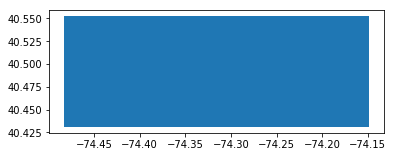

In [9]:
# df = geopandas.read_file('../coastlines/new-york_new-york.geojsonl')
df = gpd.read_file('../coastlines/map.geojson')
# df = geopandas.read_file('../coastlines/open_street_map.geojson')

df.shape

df.plot()

In [ ]:
# this is too much

# import json

# import shapely.geometry
# import geopandas_osm.osm

# with open('../coastlines/map.geojson') as f:
#     data = json.load(f)

# poly = shapely.geometry.shape(data['features'][0]['geometry'])
# df = geopandas_osm.osm.query_osm('way', poly, recurse='down', tags='highway')

# use shapefiles

These come from the NJDEP open data portal

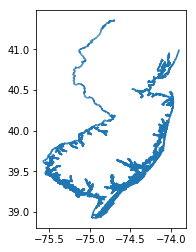

In [5]:
map_df = gpd.read_file('../coastlines/Coastline_2012_of_New_Jersey/Coastline_2012_of_New_Jersey.shp')


(40.409759, 40.6)

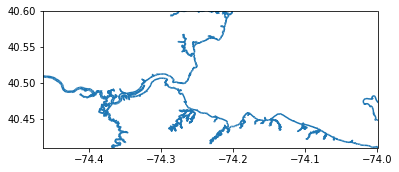

In [9]:
map_df.plot()
plt.xlim([-74.464228, -74.0])
plt.ylim([40.409759, 40.6])

In [11]:
counties_df = gpd.read_file('../coastlines/New_Jersey_Counties/New_Jersey_Counties.shp')

counties_df

,OBJECTID,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,GLOBALID,Shape_Leng,Shape_Area,geometry
0,1,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,...,204615,450,414,451,335,COASTAL,{FF3231FE-B82C-4DCB-A36E-199C86B99D48},650228.153906,1.702385e+10,"POLYGON ((443056.0100605935 311529.7698822767,..."
1,2,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,...,849843,3774,3686,3459,3544,NORTHEASTERN,{08D52232-487C-40B1-AF3A-94DE390C8BDD},443326.122021,6.686010e+09,"POLYGON ((656200.9630349278 783614.3663936108,..."
2,3,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,...,362542,547,516,482,442,SOUTHERN,{5DB6BAA6-5945-4004-8837-ECE826970808},788906.717476,2.286903e+10,"POLYGON ((436626.6899140105 491361.7799681872,..."
3,4,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,...,471650,2257,2236,2340,2073,SOUTHERN,{944EE24D-97B4-4666-9963-FC6BAE3D9334},495010.034901,6.344511e+09,"POLYGON ((342763.9898445085 423475.8301104382,..."
4,5,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,...,82266,340,358,332,288,COASTAL,{72F314BF-ED7C-4C51-A7A0-E841972BC422},514564.858771,7.976962e+09,"POLYGON ((390389.7298946753 177065.1300194412,..."
5,6,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,...,132866,313,292,275,265,SOUTHERN,{13FDB672-69ED-42E9-8E91-F67CC28C23A2},704221.618565,1.398925e+10,"POLYGON ((333743.881900508 268331.6226829439, ..."
6,7,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,...,850451,6044,6118,5768,6556,NORTHEASTERN,{AB3681F6-C903-422F-BAA8-F8C8C100572A},344556.557700,3.616984e+09,"POLYGON ((541167.9401486777 755990.8100922778,..."
7,8,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,...,199917,857,758,684,595,SOUTHERN,{7C6232C0-19D0-425D-B1B9-8AD48FFB43DA},560703.567470,9.372632e+09,"POLYGON ((315566.2499487586 382993.3398813605,..."
8,9,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,...,556972,12309,11817,10733,10808,NORTHEASTERN,{9149E983-8BE6-4812-BE3B-A0B08BF77930},381357.990132,1.436708e+09,(POLYGON ((586210.2805100083 660143.7199626938...
9,10,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,...,87361,293,279,246,200,CENTRAL,{1CFAE3C0-8842-4929-A689-A720BA8E41DE},561760.929390,1.219175e+10,"POLYGON ((391770.8147309273 705704.6764127761,..."


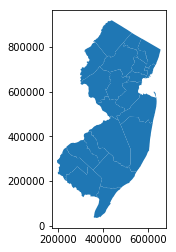

In [15]:
counties_df.plot()


(170515.9983667707, 680228.4248388322, -9284.430302347617, 963779.6277323102)

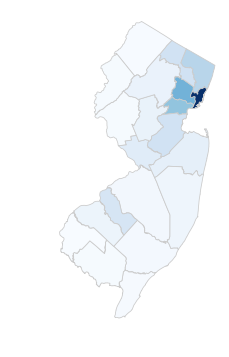

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 6))

variable = 'POPDEN2010'

counties_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')